In [23]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [24]:
data = pd.read_csv('C:/Users/MalaniR/Downloads/Bitcoin 5 Year prices.csv', index_col='Date')

In [25]:
data.shape

(1827, 5)

In [26]:
data.head()

,Close,Open,High,Low,Vol.
Date,,,,,
15/04/2018,8363.6,8004.6,8411.5,8004.6,160.26K
16/04/2018,8070.0,8362.2,8412.9,7908.5,197.70K
17/04/2018,7908.6,8070.0,8171.7,7852.8,162.59K
18/04/2018,8178.4,7908.5,8227.6,7895.3,163.26K
19/04/2018,8290.8,8179.0,8303.7,8126.7,155.08K


In [27]:
data.tail()

,Close,Open,High,Low,Vol.
Date,,,,,
11/04/2023,30209.6,29641.0,30484.6,29597.8,89.38K
12/04/2023,29886.4,30209.8,30473.0,29679.5,78.69K
13/04/2023,30387.4,29892.4,30524.1,29864.5,65.87K
14/04/2023,30472.5,30387.4,30964.9,30026.0,98.38K
15/04/2023,30380.9,30472.6,30586.5,30302.3,56.01K


In [28]:
future_days = 90

In [29]:
# Create a new column
data[str(future_days)+'_Day_Price_Forecast'] = data[['Close']].shift(-future_days)

# Show the data
data[['Close',str(future_days)+'_Day_Price_Forecast']]

,Close,90_Day_Price_Forecast
Date,,
15/04/2018,8363.6,6254.8
16/04/2018,8070.0,6362.9
17/04/2018,7908.6,6729.9
18/04/2018,8178.4,7322.0
19/04/2018,8290.8,7383.6
...,...,...
11/04/2023,30209.6,NaN
12/04/2023,29886.4,NaN
13/04/2023,30387.4,NaN


In [30]:
X = np.array(data[['Close']])
X = X[:data.shape[0]-future_days]
print(X)

[[ 8363.6]
 [ 8070. ]
 [ 7908.6]
 ...
 [19927. ]
 [20958.2]
 [20879.8]]


In [43]:
y = np.array(data[str(future_days)+'_Day_Price_Forecast'])
y = y[:-future_days]
print(y)

[ 6254.8  6362.9  6729.9 ... 30387.4 30472.5 30380.9]


In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)

In [45]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma = 0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [46]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy:', svr_rbf_confidence)

svr_rbf accuracy: 0.6252946416985822


In [47]:
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

[30182.5648924  28481.28906889 36790.20478511 10605.51375929
 22989.30898204 30341.28556118  4799.86371757  8458.40071133
 20560.94439399 33034.84928227 32215.23414893 13876.62958613
  3836.40708858 11987.20816594 20638.14401626 21156.47429253
 20038.75482359 22952.56419342 11855.29152406 32186.47214428
 30908.91575583 10176.99761516 19858.33642993  5499.34293715
 17338.25295471  8891.67715091  8243.65370306 26418.39193364
 26912.89545085 10237.63913947 28809.56685658 32070.40694311
 10731.888355   36280.19553224 10481.80149862 31510.0761148
  5510.69822576 23440.72216008 10026.31908715 25433.18655001
  5540.11371248 28617.05224903 19715.32612327 28161.4548751
  8422.6193372   9772.60324596 11892.09206369 10773.18524834
 19649.5207709  26003.08982561 35146.702674   19351.34923973
  7603.12637258 22865.89651932 10121.02968135 35905.47655004
 22660.10894662 10208.03660618 10502.76981974 17497.78640282
 19152.25558706 10652.49070671 29199.1739667  29196.47164655
 10448.60618721  8039.0314

In [48]:
print(y_test)

[42560.  16966.5 59717.6  8173.7 30380.9 40078.   9135.4  6538.8  8208.4
 46859.  61412.6 19433.3  3404.3 10818.6 32958.9 15953.   8736.9 19952.7
  3592.6 42870.6 41503.   9527.6  8509.8  6427.1 15483.7  8818.3  6967.
 28350.4 47168.7  6583.  39703.  41546.7 10776.2 57996.3  9334.9 63597.9
  9624.6 19317.4 10317.7 57345.8  5264.7 64932.6 36793.2 32496.4  7029.1
  9080.6  3616.8 10572.3 17112.6 24186.6 38248.2 16286.7  8757.9 16691.2
  9177.  41848.3 62056.3 12808.7  7766.  16294.7 21184.2  9727.8 29178.6
 35468.  10326.   6172.   3397.7  8000.4 21834.9 30837.2  7397.5  5245.2
 11900.8  8697.5 56603.8  7190.3 45593.8 23130.5 17093.3 10189.3 11327.4
  6238.5  4265.4 48306.7 40156.1  3661.7 11066.8 64278.5 19218.8  3631.8
  3574.3  6638.5  3709.4 11324.8 21043.5 20589.  10255.5 46895.2 42897.3
 53783.9 12541.5 53560.8 28868.7  9310.8  8184.9  7606.4  5261.1  9772.
 11022.8  8034.1 57380.1 23308.2  8304.4 29434.6 10229.5  7262.6 21635.
 10303.4 11809.9  8407.   3570.9 38192.2  8513.9 27391

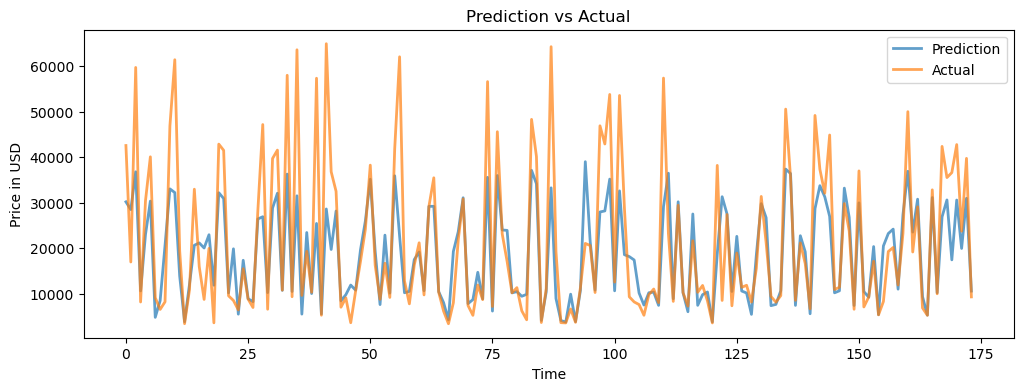

In [49]:
plt.figure(figsize=(12,4))
plt.plot(svm_prediction, label = 'Prediction', lw=2, alpha=0.7)
plt.plot(y_test, label='Actual', lw=2, alpha=0.7)
plt.title('Prediction vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()

In [50]:
import math
from sklearn.metrics import mean_squared_error

In [51]:
math.sqrt(mean_squared_error(svm_prediction, y_test))

10134.157117678344

In [52]:
from sklearn.metrics import mean_absolute_error as mae
error = mae(y_test, svm_prediction)
print("Mean absolute error : " + str(error))

Mean absolute error : 6283.7901575581445


In [53]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE
error_MAPE= MAPE(y_test, svm_prediction)
print("MAPE: ", error_MAPE)

MAPE:  0.3047036717990558


In [54]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

error2 = mean_absolute_percentage_error(y_test, svm_prediction)
print("MAPE: ", error2)

MAPE:  30.470367179905576
